## **XOR Problem using Multilayer Neural Network**
**(Forward Propogation)**

In [ ]:
import numpy as np

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [ ]:
#initialization
w1=1
w2=1
b1=-0.5
w3=1
w4=1
b2=-1.5
w5=1
w6=-2
b3=-0.5

In [ ]:
#activation fucntion
def step_function(z):
  return 1 if z>=0 else 0

In [ ]:
#forward propagation
for i in range(len(X)):
  #for hidden layers
  h1=np.dot([w1,w2],X[i])+b1
  h2=np.dot([w3,w4],X[i])+b2
  #for output layer
  final=np.dot([w5,w6],[step_function(h1),step_function(h2)])+b3
  y_pred=step_function(final)

  print(f"   Input : {X[i]}, Actual Output :{y[i]}, Predicted Output : {y_pred}")

   Input : [0 0], Actual Output :0, Predicted Output : 0
   Input : [0 1], Actual Output :1, Predicted Output : 1
   Input : [1 0], Actual Output :1, Predicted Output : 1
   Input : [1 1], Actual Output :0, Predicted Output : 0


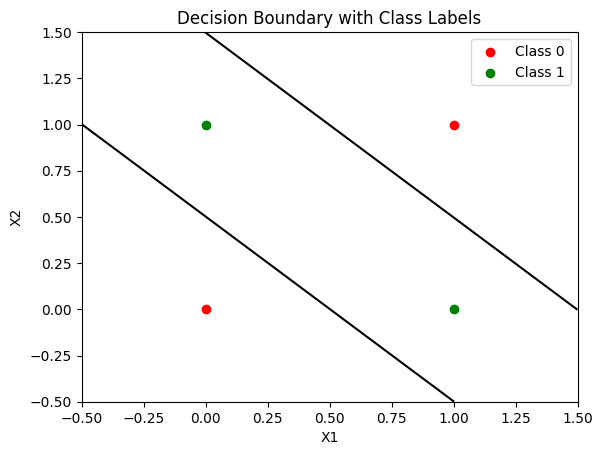

In [ ]:
#ploting decision boundary
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = []
for point in grid:
    h1 = np.dot([w1,w2], point) + b1
    h2 = np.dot([w3,w4], point) + b2
    final = np.dot([w5,w6], [step_function(h1), step_function(h2)]) + b3
    Z.append(step_function(final))
Z = np.array(Z).reshape(xx.shape)
plt.figure()
plt.contour(xx, yy, Z, levels=[0.5], colors='black')
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i,0], X[i,1], color='red', label='Class 0' if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color='green', label='Class 1' if i==1 else "")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary with Class Labels")
plt.legend()
plt.show()

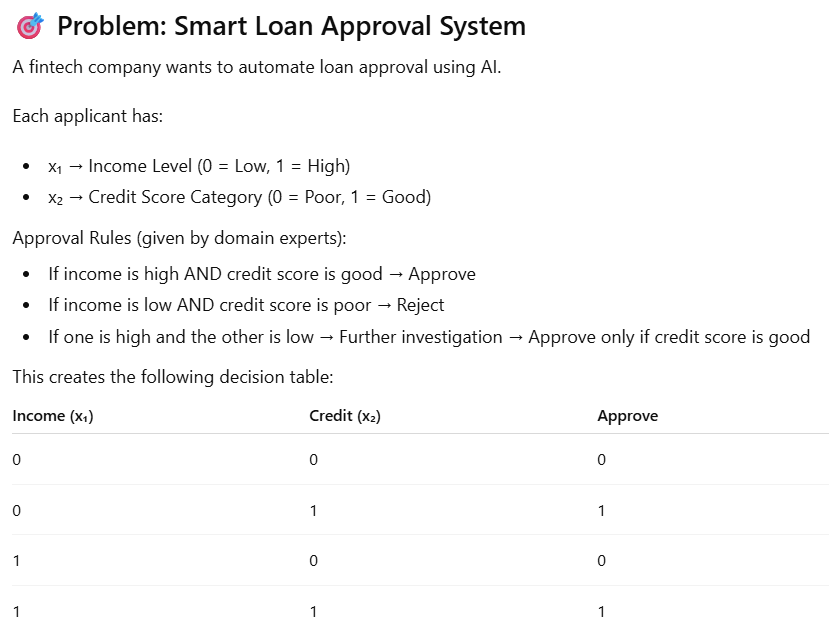

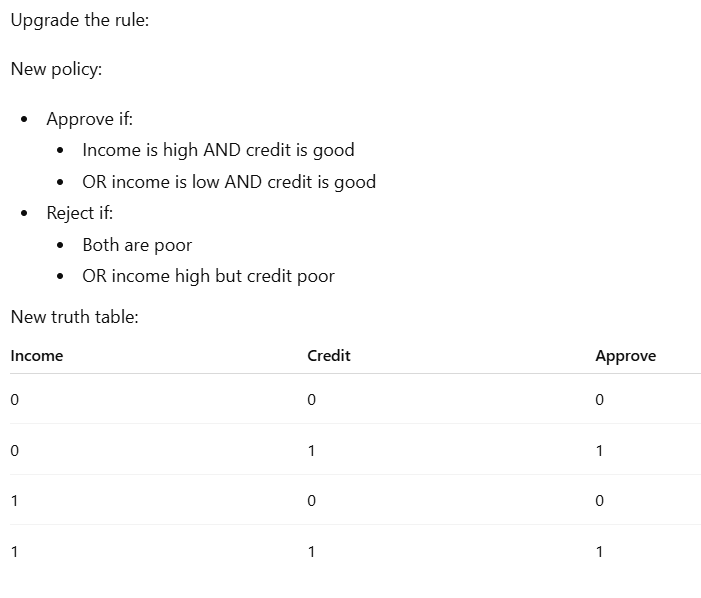

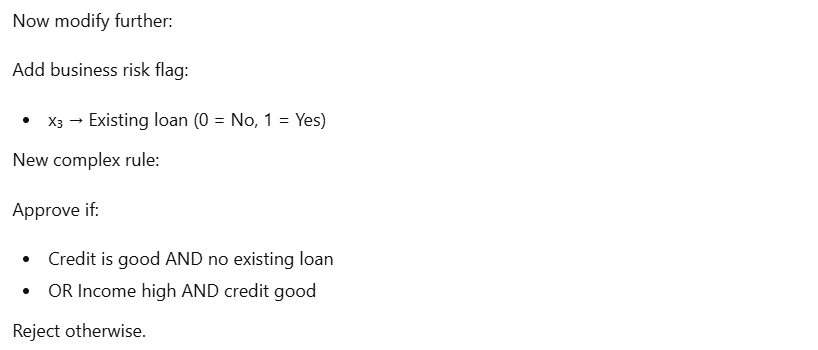

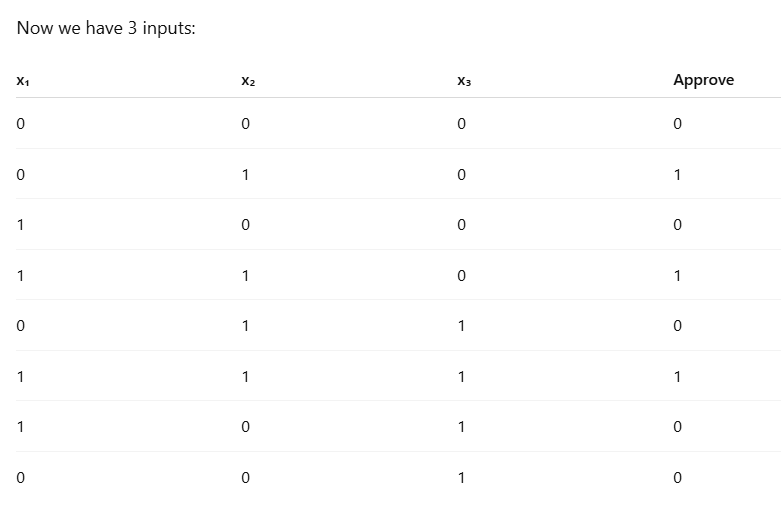

**Part A – Conceptual**

Is this problem linearly separable?

Can single perceptron solve it?

Why or why not?

The problem is not linearly separable because the approval rule uses combined AND and OR conditions.
A single perceptron cannot solve it because it can draw only one straight line (or plane).
So, we need a multilayer neural network to handle this complex decision.

**Part B – Architecture Design**

Design:

3 Inputs → 3 Hidden Neurons → 1 Output


In [ ]:
X = np.array([
    [0,0,0],
    [0,1,0],
    [1,0,0],
    [1,1,0],
    [0,1,1],
    [1,1,1],
    [1,0,1],
    [0,0,1]
])
y = np.array([0,1,0,1,0,1,0,0])

In [ ]:
#initialization of weights and bias for hidden and output layers
#for hidden neuron 1
w11=0
w12=1
w13=-1
b1=-0.5

#for hidden neuron 2
w21=1
w22=1
w23=0
b2=-1.5

#for hidden neuron 3
w31=0
w32=-1
w33=1
b3=-0.5

#for ouput neuron
w41=1
w42=1
w43=-2
b4=-0.5

In [ ]:
for i in range(len(X)):
  #for hidden layers
  h1=np.dot([w11,w12,w13],X[i])+b1
  h2=np.dot([w21,w22,w23],X[i])+b2
  h3=np.dot([w31,w32,w33],X[i])+b3
  a_h1=step_function(h1)
  a_h2=step_function(h2)
  a_h3=step_function(h3)

  #for output layer
  final=np.dot([w41,w42,w43],[a_h1,a_h2,a_h3])+b4
  y_pred=step_function(final)
  print(f"Input : {X[i]}, Actual Output : {y[i]}, Predicted Output : {y_pred}")

Input : [0 0 0], Actual Output : 0, Predicted Output : 0
Input : [0 1 0], Actual Output : 1, Predicted Output : 1
Input : [1 0 0], Actual Output : 0, Predicted Output : 0
Input : [1 1 0], Actual Output : 1, Predicted Output : 1
Input : [0 1 1], Actual Output : 0, Predicted Output : 0
Input : [1 1 1], Actual Output : 1, Predicted Output : 1
Input : [1 0 1], Actual Output : 0, Predicted Output : 0
Input : [0 0 1], Actual Output : 0, Predicted Output : 0


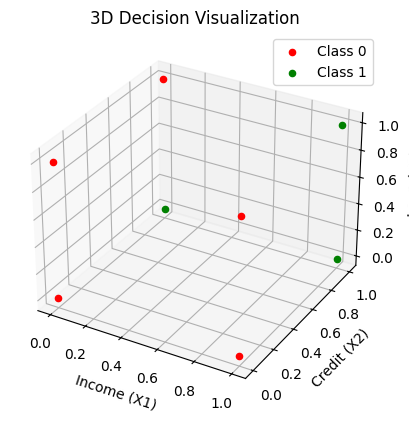

In [ ]:
# plotting decision boundary (3D)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], X[i,2], color='red', label='Class 0' if i==0 else "")
    else:
        ax.scatter(X[i,0], X[i,1], X[i,2], color='green', label='Class 1' if i==1 else "")
ax.set_xlabel("Income (X1)")
ax.set_ylabel("Credit (X2)")
ax.set_zlabel("Loan (X3)")
ax.set_title("3D Decision Visualization")
ax.legend()
plt.show()